<a href="https://colab.research.google.com/github/vinayprabhu/Single-sinusoid-frequency-estimate/blob/master/Estimating_single_sinusoidal_parameters_buried_in_noise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
PI=np.pi

# Consider the case of the single sinusoid buried in noise:

Text(0.5, 1.0, 'Time-domain signal')

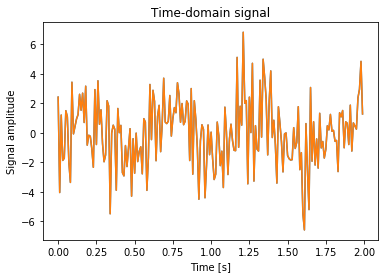

In [0]:
f = 1.73  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second
a=1.2
#############################
t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = a*np.sin( 2 * PI * f*t)+2*np.random.randn(len(t))
N=len(x)
fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
plt.plot(t,x)
plt.title('Time-domain signal')
#############################

# Now, let us take a look at it's Fourier spectrum

Text(0.5, 1.0, 'Raw arg-max-fft estimate:1.5 Hz')

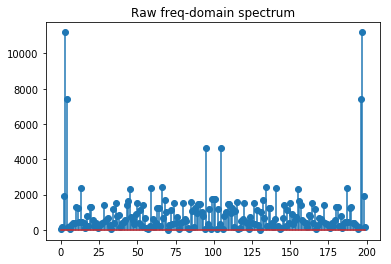

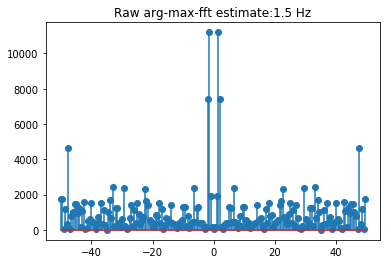

In [0]:
X_k=np.fft.fft(x)
Y_k=np.abs(X_k)**2
plt.figure()
plt.title('Raw freq-domain spectrum')
plt.stem(Y_k)
freq = np.fft.fftfreq(N, d=(1/f_s))
#############################
m_hat=np.argmax(Y_k)
if m_hat > N/2:
  m_hat=N-m_hat

plt.figure()
plt.stem(freq,Y_k)
plt.title('Raw arg-max-fft estimate:'+str(m_hat*f_s/N)+' Hz')
###############################

# Now let us run a simple iterative algorithm for adding corrections to this raw estimate:

(1.73, 1.7310185911515514, 1.2, 1.3632378466632413)

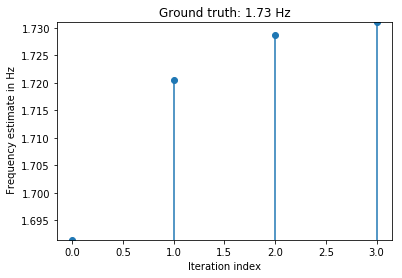

In [0]:
######################################
del_hat=0
A_hat=0
##################
Q=4
f_est=np.zeros(Q)
for i in range(Q):
  X_p=0
  X_m=0
  for n in range(N):
    X_p+= x[n]*np.exp(-1j*2*PI*(1/N)*(m_hat+del_hat+0.5)*n)
    X_m+= x[n]*np.exp(-1j*2*PI*(1/N)*(m_hat+del_hat-0.5)*n)
    
  S_p=np.conj(A_hat)*(1+np.exp(-1j*4*PI*del_hat))/(1-np.exp(-1j*2*PI*(1/N)*(2*m_hat+2*del_hat+0.5)))  
  S_m=np.conj(A_hat)*(1+np.exp(-1j*4*PI*del_hat))/(1-np.exp(-1j*2*PI*(1/N)*(2*m_hat+2*del_hat-0.5))) 
  
  S_hat_p=X_p-S_p
  S_hat_m=X_m-S_m
  
  del_hat=del_hat+0.5*np.real((S_hat_p+S_hat_m)/(S_hat_p-S_hat_m))
  f_est[i]=(m_hat+del_hat)*f_s/N
  term_1=0
  for n in range(N):
    term_1+=x[n]*np.exp(-1j*2*PI*(1/N)*(m_hat+del_hat)*n)
  term_2=np.conj(A_hat)*(1-np.exp(-1j*4*PI*del_hat))/(1-np.exp(-1j*4*PI*(1/N)*(m_hat+del_hat)))
  
  A_hat=(1/N)*(term_1-term_2)

f_hat=(m_hat+del_hat)*f_s/N
a_hat=2*np.abs(A_hat)

plt.figure()
plt.stem(np.arange(Q),f_est)
plt.title('Ground truth: '+str(f)+' Hz')
plt.ylim([min(f_est),max(f_est)]);
plt.ylabel(' Frequency estimate in Hz')
plt.xlabel('Iteration index')

(f,f_hat,a,a_hat)